## 1.스택

In [ ]:
stack = []
print(len(stack))

0


In [ ]:
# v를 스택의 맨 뒤에 추가한다
def push(v):
    stack.append(v)

In [ ]:
push(1)
push(2)
push(3)
print(stack)

[1, 2, 3]


In [ ]:
def pop():
    # underflow
    if not len(stack):    # if not stack
        print('stack underflow')
        return -1
    
    return stack.pop(-1)

In [ ]:
stack.clear()
push(1)
push(2)
push(3)
pop()
pop()
push(4)
push(5)
pop()
print(stack)
pop()
pop()
pop()

[1, 4]
stack underflow


-1

### 1-1. stack 구현, top = -1로 초기화

In [ ]:
N = 3
stack2 = ['']*N
top = -1 # 마지막 item의 위치 - 사용
#top = 0 # 다음 item의 위치
#top = N # 마지막 item의 위치
#top = N-1 # 다음 item의 위치
print(len(stack2))

3


In [ ]:
# push 구현
def push2(v):
    global top
    # overflow 확인  
    # N, top를 사용해서 조건 작성
    if top >= N - 1:     
        print('stack overflow')
        return -1
    top += 1
    stack2[top] = v 

    # top를 증가하고, v를 top에 넣기

In [ ]:
top = -1
push2(1)
push2(2)
push2(3)
push2(4)  # overflow 확인
print(stack2, top)

stack overflow
[1, 2, 3] 2


In [ ]:
# pop 구현
def pop2():
    global top
    # underflow 확인
    if top < 0:
        print('underflow')
        return
    # top에 있는 item을 임시변수에 저장, top가 감소
    # 임시변수에 있는 item을 반환
    x = stack2[top]
    top -= 1
    return x

In [ ]:
# pop 구현
def pop2():
    global top
    # underflow 확인
    if top < 0:
        print('underflow')
        return
    # top에 있는 item을 임시변수에 저장, top가 감소
    # 임시변수에 있는 item을 반환
    top -= 1
    return stack2[top+1]

In [ ]:
top = -1
push2(1)
push2(2)
push2(3)
#push2(4)  # overflow 확인
x = pop2()
y = pop2()
z = pop2()
pop2()    # underflow 확인
push2(4)
push2(5)
push2(6)
r = pop2()
print(x, y, z, r, stack2, top)

underflow
3 2 1 6 [4, 5, 6] 1


### 1-2. stack 구현, top = 0 으로 초기화

In [ ]:
N = 3
stack3 = ['']*N
#top = -1 # 마지막 item의 위치 - 사용
top = 0 # 다음 item의 위치
#top = N # 마지막 item의 위치
#top = N-1 # 다음 item의 위치
print(len(stack3))

## 2.재귀(reculsive)

### 2-1. 함수의 호출

In [ ]:
#  함수의 호출은 stack의 원리 (LIFO)을 따른다

In [ ]:
def func_C():
    print('func_C1')
    print('func_C2')

def func_B():
    print('func_B1')
    func_C()
    print('func_B2')


def func_A():
    print('func_A1')
    func_B()
    print('func_A2')

func_A()

func_A1
func_B1
func_C1
func_C2
func_B2
func_A2


### 2-2. 재귀의 동작 이해
- 종료를 위한 조건이 위에 작성되는 것이 일반적임

In [ ]:
def func_A(level):
    if level >= 3 :
        return
    print('func_A1', level)
    func_A(level + 1)
    print('func_A2', level)
    #return None

In [ ]:
func_A(0)

func_A1 0
func_A1 1
func_A1 2
func_A2 2
func_A2 1
func_A2 0


In [ ]:
func_A(0) -> 'func_A1' -> func_A(1) -> 'func_A2'
    func_A(1) -> 'func_A1' -> func_A(2) -> 'func_A2'
        func_A(2) -> 'func_A1' -> func_A(3) -> 'func_A2'
            func_A(3) -> return

### 2-3. 재귀함수 속에 재귀 호출 2회 이상
- 이런 것을 위해 재귀를 사용하죠 ^^!!

In [ ]:
# 시간이 충분하신 분만 도전
def func_B(level):
    if level >= 3:
        return
    print('func_B1', level)
    func_B(level+1)
    print('func_B2', level)
    func_B(level+1)
    print('func_B3', level)

In [ ]:
func_B(0)

In [ ]:
func_B(0) -> 'func_B1 0' -> func_B(1)
   func_B(1) -> 

## 3.DFS(Depth First Search)

### 3-1. 재귀로 작성

> 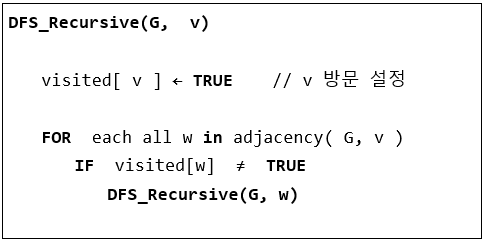

### 3-2. 반복문으로 작성 -1
- 스택에 일단 다 넣고 꺼내기 방법

> 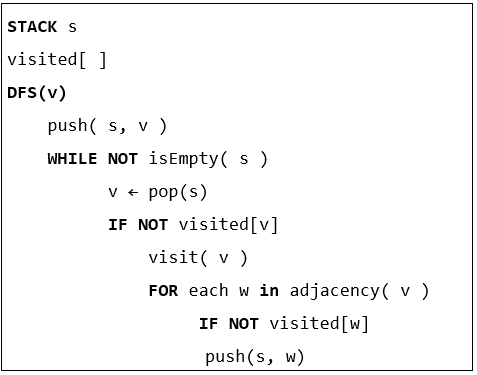

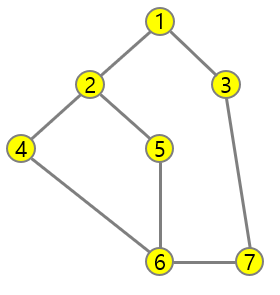

In [ ]:
[1, 3, 7, 6, 5, 2, 4]
travel = [1, 3, 7, 6, 5, 2, 4]
visited [0, 1, 1, 1, 1, 1, 1, 1]
stack []
node = 2

In [ ]:
# 입력
V, E = 7, 8
edges = [(1, 2), (1, 3), (2, 4), (2, 5), (4, 6), (5, 6), (6, 7), (3, 7)]

In [ ]:
# 인접 행렬(Matrix) = V*V
AM = [[0]*(V+1) for _ in range(V+1)]
for s,e in edges:
    AM[s][e] = 1
    AM[e][s] = 1 

# 인접 리스트(List) = V
AL = [[] for _ in range(V+1)]
for s,e in edges:
    AL[s] += [e]
    AL[e] += [s]

In [ ]:
for x in AL:
    print(x)

[]
[2, 3]
[1, 4, 5]
[1, 7]
[2, 6]
[2, 6]
[4, 5, 7]
[6, 3]


In [ ]:
# 1. 시작 정점을 스택에 push
    # 2. 스택에 내용이 있는 동안 반복
    # 2-1. 스택에서 pop해서 node로 저장한다
        # 2-2. node에 대해서 방문했는지 확인해서 '방문을 안 했을때' 
        # 2-2-1. node를 방문표시를 한다
        # 2-2-2. node와 연결되어 있으면서 아직 방문하지 않은 node를 스택에 push 한다

In [ ]:
# AM 사용해서 작성해 보기
def DFS_am(V, AM, sv):
    visited = [0] * (V+1)
    travel = []
    stack = [sv]

    while len(stack):        
        node = stack.pop()
        if not visited[node]:
            visited[node] = 1
            travel.append(node)
            for c in range(1, V+1):
                if AM[node][c] == 1 and visited[c] == 0:
                    stack.append(c)
    
    # DFS의 while을 끝낸시점
    print(stack)
    print(visited)
    print(travel)


In [ ]:
# AL 사용해서 작성해 보기
def DFS_al(V, AL, sv):
    visited = [0] * (V+1)
    travel = []
    stack = [sv]  # 1
    while len(stack): # 2
        node = stack.pop() # 2-1
        if not visited[node]: # 2-2
            visited[node] = 1 # 2-2-1
            travel.append(node)
            for n in AL[node]: # 2-2-2
                if not visited[n]:
                    stack.append(n)
    
    # DFS의 while을 끝낸시점
    print(stack)
    print(visited)
    print(travel)

In [ ]:
## AL
[]
[2, 3]
[1, 4, 5]
[1, 7]
[2, 6]
[2, 6]
[4, 5, 7]
[6, 3]

In [ ]:
# v는 방문되지 않은 정점으로, 방문하러 들어옴
# visited[v] = 1  -> 방문처리를 한다
# v와 연결된 것 중에 방문하지 않은 것을 찾아 DFS를 호출한다.

# visited를 argument로 사용하지 않을 경우 testcase가 여러 개 인 것을 고려하여 '초기화'를 잘 해 주어야 한다
travel = []
def DFS_re(AL, v):
    visited[v] = 1
    travel.append(v)
    for w in AL[v]:
        if not visited[w]:
            DFS_re(AL, w)
    return None

In [ ]:
visited = [0]*(V+1)
travel = []
DFS_re(AL, 1)
print(travel)

[1, 2, 4, 6, 5, 7, 3]


#### 3-2-1. global에 선언된 list의 사용
- testcase가 여러 개 일 경우 '초기화'에 주의 해야 함

In [ ]:
a = [3,4,5,6,7]  #      # global namespace = {'a' : 0x1000, ...}
def func():
    a.clear()
    a.append(1)
    a.insert(0, 2)

func()
print(a)

[2, 1]


#### 3-2-2. 재귀 호출/반환 과정

In [ ]:
DFS_re(AL, 1, [0, 0, 0, 0, 0, 0, 0, 0]) -> v = [0, 1, 0, 0, 0, 0, 0, 0], t = [1] -> for [2, 3] DFS_re(AL, 2, [0, 1, 0, 0, 0, 0, 0, 0]) -> return
  DFS_re(AL, 2, [0, 1, 0, 0, 0, 0, 0, 0]) ->  v = [0, 1, 1, 0, 0, 0, 0, 0], t = [1, 2] -> for [1,4,5] DFS_re(AL, 4, [0, 1, 1, 0, 0, 0, 0, 0]) -> return
    DFS_re(AL, 4, [0, 1, 1, 0, 0, 0, 0, 0]) -> v = [0, 1, 1, 0, 1, 0, 0, 0], t = [1, 2, 4] -> for[2, 6] DFS_re(AL, 6, [0, 1, 1, 0, 1, 0, 0, 0]) -> return
      DFS_re(AL, 6, [0, 1, 1, 0, 1, 0, 0, 0]) -> v = [0, 1, 1, 0, 1, 0, 1, 0], t = [1, 2, 4, 6] -> for[4,5,7] DFS_re(AL, 5, [0, 1, 1, 0, 1, 0, 1, 0]), DFS_re(AL, 7, [0, 1, 1, 0, 1, 1, 1, 0]) ->return
        DFS_re(AL, 5, [0, 1, 1, 0, 1, 0, 1, 0]) -> v = [0, 1, 1, 0, 1, 1, 1, 0], t = [1, 2, 4, 6, 5] -> return
          DFS_re(AL, 7, [0, 1, 1, 0, 1, 1, 1, 0]) -> v = [0, 1, 1, 0, 1, 1, 1, 1], t = [1, 2, 4, 6, 5, 7] -> for[6, 3] DFS_re(AL, 3, [0, 1, 1, 0, 1, 1, 1, 1]) -> return
            DFS_re(AL, 3, [0, 1, 1, 0, 1, 1, 1, 1]) -> v= [0, 1, 1, 1, 1, 1, 1, 1], t = [1, 2, 4, 6, 5, 7, 3] -> return

In [ ]:

visited = [0, 0, 0, 0, 0, 0, 0, 0]
DFS_re(AL, 1, visited) -> v[1] = 1, t = [1] -> for [2, 3] DFS_re(AL, 2, visited) -> return
  DFS_re(AL, 2, visited) ->  v[2] = 1, t = [1, 2] -> for [1,4,5] DFS_re(AL, 4, visited) -> return
    DFS_re(AL, 4, visited) -> v[4] = 1, t = [1, 2, 4] -> for[2, 6] DFS_re(AL, 6, visited) -> return
      DFS_re(AL, 6, visited) -> v[6] = 1, t = [1, 2, 4, 6] -> for[4,5,7] DFS_re(AL, 5, visited), DFS_re(AL, 7, visited) ->return
        DFS_re(AL, 5, visited) -> v[5] = 1, t = [1, 2, 4, 6, 5] -> return
          DFS_re(AL, 7, visited) -> v[7] = 1, t = [1, 2, 4, 6, 5, 7] -> for[6, 3] DFS_re(AL, 3, visited) -> return
            DFS_re(AL, 3, visited) -> v[3] = 1, t = [1, 2, 4, 6, 5, 7, 3] -> return

### 3-3. 반복문으로 작성 -2

> 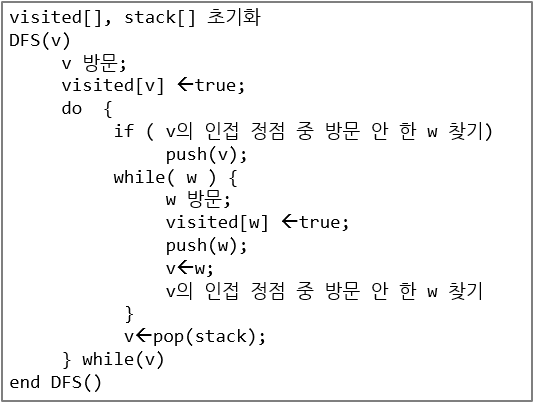

## 4.입력 방법

In [ ]:
1 2 1 3 2 4 2 5 4 6 5 6 6 7 3 7
line = list(map(int, input().split()))
edges = [(line[i], line[i + 1]) for i in range(0, len(line), 2)]
edges = [(line[i], line[i + 1]) for i in range(0, E*2, 2)]   # i = 0  0, 1  i=2  2, 3 

In [ ]:
7 8
1 2 
1 3
2 4
2 5
4 6
5 6
6 7
3 7
edges = [ tuple(map(int, input().split())) for _ in range(E) ]